In [6]:

# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import seaborn as sns
get_ipython().magic('matplotlib inline')

# Census API Key
from localenv import census_api_key

In [7]:
# Load census daya 2011 - 2015

c11 = Census(census_api_key, year=2011)
c12 = Census(census_api_key, year=2012)
c13 = Census(census_api_key, year=2013)
c14 = Census(census_api_key, year=2014)
c15 = Census(census_api_key, year=2015)

In [8]:
census_data11 = c11.acs5.get(("NAME",
                          "B19013_001E",
                          "B01003_001E",
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E",
                          "B25077_001E"), {'for': 'state:*'})

census_data11_5 = c11.acs5.get(("NAME",
                          "B19013_001E",
                          "B01003_001E",
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E",
                          "B25077_001E"), {'for': 'state: 8, 6, 48, 41, 46'})

census_data12 = c12.acs5.get(("NAME",
                          "B19013_001E",
                          "B01003_001E",
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E",
                          "B25077_001E"), {'for': 'state:*'})

census_data12_5 = c12.acs5.get(("NAME",
                          "B19013_001E",
                          "B01003_001E",
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E",
                          "B25077_001E"), {'for': 'state: 8, 6, 48, 41, 46'})

census_data13 = c13.acs5.get(("NAME",
                          "B19013_001E",
                          "B01003_001E",
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E",
                          "B25077_001E"), {'for': 'state:*'})

census_data13_5 = c13.acs5.get(("NAME",
                          "B19013_001E",
                          "B01003_001E",
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E",
                          "B25077_001E"), {'for': 'state: 8, 6, 48, 41, 46'})

census_data14 = c14.acs5.get(("NAME",
                          "B19013_001E",
                          "B01003_001E",
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E",
                          "B25077_001E"), {'for': 'state:*'})

census_data14_5 = c14.acs5.get(("NAME",
                          "B19013_001E",
                          "B01003_001E",
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E",
                          "B25077_001E"), {'for': 'state: 8, 6, 48, 41, 46'})

census_data15 = c15.acs5.get(("NAME",
                          "B19013_001E",
                          "B01003_001E",
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E",
                          "B25077_001E"), {'for': 'state:*'})

census_data15_5 = c15.acs5.get(("NAME",
                          "B19013_001E",
                          "B01003_001E",
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E",
                          "B25077_001E"), {'for': 'state: 8, 6, 48, 41, 46'})


In [9]:
# Convert to DataFrame
census_pd11 = pd.DataFrame(census_data11)
census_pd11_5 = pd.DataFrame(census_data11_5)

# Column Reordering
census_pd11 = census_pd11.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income (2011)",
                                      "B23025_005E": "Unemployment Count (2011)",
                                      "B25058_001E": "Median Rent (2011)",
                                      "B25077_001E": "Median Home Value (2011)",
                                      "NAME": "Name",
                                      "state": "State"})

census_pd11_5 = census_pd11_5.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income (2011)",
                                      "B23025_005E": "Unemployment Count (2011)",
                                      "B25058_001E": "Median Rent (2011)",
                                      "B25077_001E": "Median Home Value (2011)",
                                      "NAME": "Name",
                                      "state": "State"})

# Add in Employment Rate (Employment Count / Population)
census_pd11["Unemployment Rate (2011)"] = 100 * \
    census_pd11["Unemployment Count (2011)"].astype(
        int) / census_pd11["Population"].astype(int)

census_pd11_5["Unemployment Rate (2011)"] = 100 * \
    census_pd11_5["Unemployment Count (2011)"].astype(
        int) / census_pd11_5["Population"].astype(int)

# Final DataFrame
census_pd11 = census_pd11[["State", "Name", "Population", "Median Age", "Household Income (2011)", "Unemployment Rate (2011)", "Median Rent (2011)", "Median Home Value (2011)"]]

census_pd11_5 = census_pd11_5[["State", "Name", "Population", "Median Age", "Household Income (2011)", "Unemployment Rate (2011)", "Median Rent (2011)", "Median Home Value (2011)"]]

census_pd11 = census_pd11.sort_values('State', ascending=True)
census_pd11_5 = census_pd11_5.sort_values('State', ascending=True)
census_pd11.head()
census_pd11_5.head()

,State,Name,Population,Median Age,Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011)
0,06,California,36969200,35.1,61632,5.055211,1083,421600
1,08,Colorado,4966061,35.9,57685,4.093365,771,236700
2,41,Oregon,3801991,38.2,49850,5.030943,716,252600
3,46,South Dakota,807697,37.1,48010,2.594785,482,127000
4,48,Texas,24774187,33.5,50920,3.594217,651,126400


In [10]:
# Convert to DataFrame
census_pd12 = pd.DataFrame(census_data12)
census_pd12_5 = pd.DataFrame(census_data12_5)

# Column Reordering
census_pd12 = census_pd12.rename(columns={"B01003_001E": "Population (2012)",
                                      "B01002_001E": "Median Age (2012)",
                                      "B19013_001E": "Household Income (2012)",
                                      "B23025_005E": "Unemployment Count (2012)",
                                      "B25058_001E": "Median Rent (2012)",
                                      "B25077_001E": "Median Home Value (2012)",
                                      "NAME": "Name (2012)",
                                      "state": "State (2012)"})

census_pd12_5 = census_pd12_5.rename(columns={"B01003_001E": "Population (2012)",
                                      "B01002_001E": "Median Age (2012)",
                                      "B19013_001E": "Household Income (2012)",
                                      "B23025_005E": "Unemployment Count (2012)",
                                      "B25058_001E": "Median Rent (2012)",
                                      "B25077_001E": "Median Home Value (2012)",
                                      "NAME": "Name (2012)",
                                      "state": "State (2012)"})

# Add in Employment Rate (Employment Count / Population)
census_pd12["Unemployment Rate (2012)"] = 100 * \
    census_pd12["Unemployment Count (2012)"].astype(
        int) / census_pd12["Population (2012)"].astype(int)

census_pd12_5["Unemployment Rate (2012)"] = 100 * \
    census_pd12_5["Unemployment Count (2012)"].astype(
        int) / census_pd12_5["Population (2012)"].astype(int)

# Final DataFrame
census_pd12 = census_pd12[["Name (2012)", "State (2012)", "Population (2012)", "Median Age (2012)", "Household Income (2012)", "Unemployment Rate (2012)", "Median Rent (2012)", "Median Home Value (2012)"]]

census_pd12_5 = census_pd12_5[["Name (2012)", "State (2012)", "Population (2012)", "Median Age (2012)", "Household Income (2012)", "Unemployment Rate (2012)", "Median Rent (2012)", "Median Home Value (2012)"]]

census_pd12 = census_pd12.sort_values('State (2012)', ascending=True)
census_pd12_5 = census_pd12_5.sort_values('State (2012)', ascending=True)
census_pd12.head()
census_pd12_5.head()


,Name (2012),State (2012),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012)
0,California,06,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0
1,Colorado,08,5042853.0,36.1,58244.0,4.331259,802.0,236800.0
2,Oregon,41,3836628.0,38.4,50036.0,5.483435,729.0,246100.0
3,South Dakota,46,815871.0,37.1,49091.0,2.658141,505.0,129800.0
4,Texas,48,25208897.0,33.6,51563.0,3.809798,666.0,128000.0


In [11]:
# Convert to DataFrame
census_pd13 = pd.DataFrame(census_data13)
census_pd13_5 = pd.DataFrame(census_data13_5)

# Column Reordering
census_pd13 = census_pd13.rename(columns={"B01003_001E": "Population (2013)",
                                      "B01002_001E": "Median Age (2013)",
                                      "B19013_001E": "Household Income (2013)",
                                      "B23025_005E": "Unemployment Count (2013)",
                                      "B25058_001E": "Median Rent (2013)",
                                      "B25077_001E": "Median Home Value (2013)",
                                      "NAME": "Name (2013)",
                                      "state": "State (2013)"})

census_pd13_5 = census_pd13_5.rename(columns={"B01003_001E": "Population (2013)",
                                      "B01002_001E": "Median Age (2013)",
                                      "B19013_001E": "Household Income (2013)",
                                      "B23025_005E": "Unemployment Count (2013)",
                                      "B25058_001E": "Median Rent (2013)",
                                      "B25077_001E": "Median Home Value (2013)",
                                      "NAME": "Name (2013)",
                                      "state": "State (2013)"})

# Add in Employment Rate (Employment Count / Population)
census_pd13["Unemployment Rate (2013)"] = 100 * \
    census_pd13["Unemployment Count (2013)"].astype(
        int) / census_pd13["Population (2013)"].astype(int)

census_pd13_5["Unemployment Rate (2013)"] = 100 * \
    census_pd13_5["Unemployment Count (2013)"].astype(
        int) / census_pd13_5["Population (2013)"].astype(int)

# Final DataFrame
census_pd13 = census_pd13[["Name (2013)", "State (2013)", "Population (2013)", "Median Age (2013)", "Household Income (2013)", "Unemployment Rate (2013)", "Median Rent (2013)", "Median Home Value (2013)"]]

census_pd13_5 = census_pd13_5[["Name (2013)", "State (2013)", "Population (2013)", "Median Age (2013)", "Household Income (2013)", "Unemployment Rate (2013)", "Median Rent (2013)", "Median Home Value (2013)"]]

census_pd13 = census_pd13.sort_values('State (2013)', ascending=True)
census_pd13_5 = census_pd13_5.sort_values('State (2013)', ascending=True)
census_pd13.head()
census_pd13_5.head()


,Name (2013),State (2013),Population (2013),Median Age (2013),Household Income (2013),Unemployment Rate (2013),Median Rent (2013),Median Home Value (2013)
0,California,06,37659181.0,35.4,61094.0,5.758662,1119.0,366400.0
1,Colorado,08,5119329.0,36.1,58433.0,4.526785,825.0,236200.0
2,Oregon,41,3868721.0,38.7,50229.0,5.717419,749.0,238000.0
3,South Dakota,46,825198.0,36.9,49495.0,2.696323,517.0,132400.0
4,Texas,48,25639373.0,33.8,51900.0,3.978771,688.0,128900.0


In [12]:
# Convert to DataFrame
census_pd14 = pd.DataFrame(census_data14)
census_pd14_5 = pd.DataFrame(census_data14_5)

# Column Reordering
census_pd14 = census_pd14.rename(columns={"B01003_001E": "Population (2014)",
                                      "B01002_001E": "Median Age (2014)",
                                      "B19013_001E": "Household Income (2014)",
                                      "B23025_005E": "Unemployment Count (2014)",
                                      "B25058_001E": "Median Rent (2014)",
                                      "B25077_001E": "Median Home Value (2014)",
                                      "NAME": "Name (2014)",
                                      "state": "State (2014)"})

census_pd14_5 = census_pd14_5.rename(columns={"B01003_001E": "Population (2014)",
                                      "B01002_001E": "Median Age (2014)",
                                      "B19013_001E": "Household Income (2014)",
                                      "B23025_005E": "Unemployment Count (2014)",
                                      "B25058_001E": "Median Rent (2014)",
                                      "B25077_001E": "Median Home Value (2014)",
                                      "NAME": "Name (2014)",
                                      "state": "State (2014)"})

# Add in Employment Rate (Employment Count / Population)
census_pd14["Unemployment Rate (2014)"] = 100 * \
    census_pd14["Unemployment Count (2014)"].astype(
        int) / census_pd14["Population (2014)"].astype(int)

census_pd14_5["Unemployment Rate (2014)"] = 100 * \
    census_pd14_5["Unemployment Count (2014)"].astype(
        int) / census_pd14_5["Population (2014)"].astype(int)

# Final DataFrame
census_pd14 = census_pd14[["Name (2014)", "State (2014)", "Population (2014)", "Median Age (2014)", "Household Income (2014)", "Unemployment Rate (2014)", "Median Rent (2014)", "Median Home Value (2014)"]]

census_pd14_5 = census_pd14_5[["Name (2014)", "State (2014)", "Population (2014)", "Median Age (2014)", "Household Income (2014)", "Unemployment Rate (2014)", "Median Rent (2014)", "Median Home Value (2014)"]]

census_pd14 = census_pd14.sort_values('State (2014)', ascending=True)
census_pd14.head()
census_pd14_5 = census_pd14_5.sort_values('State (2014)', ascending=True)
census_pd14_5.head()



,Name (2014),State (2014),Population (2014),Median Age (2014),Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014)
0,California,06,38066920.0,35.6,61489.0,5.476051,1138.0,371400.0
1,Colorado,08,5197580.0,36.2,59448.0,4.218136,848.0,239400.0
2,Oregon,41,3900343.0,38.9,50521.0,5.287279,766.0,234100.0
3,South Dakota,46,834708.0,36.8,50338.0,2.559458,533.0,135700.0
4,Texas,48,26092033.0,33.9,52576.0,3.765824,707.0,131400.0


In [13]:
# Convert to DataFrame
census_pd15 = pd.DataFrame(census_data15)
census_pd15_5 = pd.DataFrame(census_data15_5)

# Column Reordering
census_pd15 = census_pd15.rename(columns={"B01003_001E": "Population (2015)",
                                      "B01002_001E": "Median Age (2015)",
                                      "B19013_001E": "Household Income (2015)",
                                      "B23025_005E": "Unemployment Count (2015)",
                                      "B25058_001E": "Median Rent (2015)",
                                      "B25077_001E": "Median Home Value (2015)",
                                      "NAME": "Name (2015)",
                                      "state": "State (2015)"})

census_pd15_5 = census_pd15_5.rename(columns={"B01003_001E": "Population (2015)",
                                      "B01002_001E": "Median Age (2015)",
                                      "B19013_001E": "Household Income (2015)",
                                      "B23025_005E": "Unemployment Count (2015)",
                                      "B25058_001E": "Median Rent (2015)",
                                      "B25077_001E": "Median Home Value (2015)",
                                      "NAME": "Name (2015)",
                                      "state": "State (2015)"})

#print(census_pd15_5.xs('Name (2015)', axis=1))
#print(census_pd15_5.xs('Population (2015)', axis=1))
#print(census_pd15.xs('Population (2015)', axis=1))
#print(census_pd15.xs('Name (2015)', axis=1))

# Add in Employment Rate (Employment Count / Population)
census_pd15["Unemployment Rate (2015)"] = 100 * \
    census_pd15["Unemployment Count (2015)"].astype(
        int) / census_pd15["Population (2015)"].astype(int)

census_pd15_5["Unemployment Rate (2015)"] = 100 * \
    census_pd15_5["Unemployment Count (2015)"].astype(
        int) / census_pd15_5["Population (2015)"].astype(int)

# Final DataFrame
census_pd15 = census_pd15[["Name (2015)", "State (2015)", "Population (2015)", "Median Age (2015)", "Household Income (2015)", "Unemployment Rate (2015)", "Median Rent (2015)", "Median Home Value (2015)"]]

census_pd15_5 = census_pd15_5[["Name (2015)", "State (2015)", "Population (2015)", "Median Age (2015)", "Household Income (2015)", "Unemployment Rate (2015)", "Median Rent (2015)", "Median Home Value (2015)"]]

census_pd15 = census_pd15.sort_values('State (2015)', ascending=True)
census_pd15.head()
census_pd15_5 = census_pd15_5.sort_values('State (2015)', ascending=True)
census_pd15_5.head()


,Name (2015),State (2015),Population (2015),Median Age (2015),Household Income (2015),Unemployment Rate (2015),Median Rent (2015),Median Home Value (2015)
0,California,06,38421464.0,35.8,61818.0,4.921939,1149.0,385500.0
1,Colorado,08,5278906.0,36.3,60629.0,3.704896,880.0,247800.0
2,Oregon,41,3939233.0,39.1,51243.0,4.671366,779.0,237300.0
3,South Dakota,46,843190.0,36.8,50957.0,2.398036,542.0,140500.0
4,Texas,48,26538614.0,34.1,53207.0,3.436758,722.0,136000.0


In [14]:
#merging 2011-2012
census_merge1112 = pd.merge(census_pd11, census_pd12, left_index=True, right_index=True, how='outer')
census_merge1112_5 = pd.merge(census_pd11_5, census_pd12_5, left_index=True, right_index=True, how='outer')

census_merge1112.rename(index=str, columns={"Name":"State"})
dropColumns = ["Name (2012)"]
census_merge1112_5.rename(index=str, columns={"Name":"State"})
dropColumns = ["Name (2012)"]

census_merge1112.drop(dropColumns, inplace=True, axis=1)
census_merge1112_5.drop(dropColumns, inplace=True, axis=1)
census_merge1112.head()
census_merge1112_5.head()

,State,Name,Population,Median Age,Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),State (2012),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012)
0,06,California,36969200,35.1,61632,5.055211,1083,421600,06,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0
1,08,Colorado,4966061,35.9,57685,4.093365,771,236700,08,5042853.0,36.1,58244.0,4.331259,802.0,236800.0
2,41,Oregon,3801991,38.2,49850,5.030943,716,252600,41,3836628.0,38.4,50036.0,5.483435,729.0,246100.0
3,46,South Dakota,807697,37.1,48010,2.594785,482,127000,46,815871.0,37.1,49091.0,2.658141,505.0,129800.0
4,48,Texas,24774187,33.5,50920,3.594217,651,126400,48,25208897.0,33.6,51563.0,3.809798,666.0,128000.0


In [15]:
#merging 2011-2013
census_merge111213 = pd.merge(census_merge1112, census_pd13, left_index=True, right_index=True, how='outer')
dropColumns = ["Name (2013)"]

census_merge111213_5 = pd.merge(census_merge1112_5, census_pd13_5, left_index=True, right_index=True, how='outer')
dropColumns = ["Name (2013)"]

census_merge111213.drop(dropColumns, inplace=True, axis=1)
census_merge111213_5.drop(dropColumns, inplace=True, axis=1)
census_merge111213
census_merge111213_5

,State,Name,Population,Median Age,Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),State (2012),Population (2012),...,Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012),State (2013),Population (2013),Median Age (2013),Household Income (2013),Unemployment Rate (2013),Median Rent (2013),Median Home Value (2013)
0,06,California,36969200,35.1,61632,5.055211,1083,421600,06,37325068.0,...,5.517589,1110.0,383900.0,06,37659181.0,35.4,61094.0,5.758662,1119.0,366400.0
1,08,Colorado,4966061,35.9,57685,4.093365,771,236700,08,5042853.0,...,4.331259,802.0,236800.0,08,5119329.0,36.1,58433.0,4.526785,825.0,236200.0
2,41,Oregon,3801991,38.2,49850,5.030943,716,252600,41,3836628.0,...,5.483435,729.0,246100.0,41,3868721.0,38.7,50229.0,5.717419,749.0,238000.0
3,46,South Dakota,807697,37.1,48010,2.594785,482,127000,46,815871.0,...,2.658141,505.0,129800.0,46,825198.0,36.9,49495.0,2.696323,517.0,132400.0
4,48,Texas,24774187,33.5,50920,3.594217,651,126400,48,25208897.0,...,3.809798,666.0,128000.0,48,25639373.0,33.8,51900.0,3.978771,688.0,128900.0


In [16]:
census_merge1112.head()

,State,Name,Population,Median Age,Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),State (2012),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800,01,4777326.0,37.8,43160.0,4.830694,488.0,122300.0
1,02,Alaska,700703,33.8,69014,4.414424,913,235100,02,711139.0,33.8,69917.0,4.411093,950.0,237900.0
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400,04,6410979.0,36.0,50256.0,4.619139,742.0,175900.0
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100,05,2916372.0,37.4,40531.0,4.023972,468.0,106300.0
4,06,California,36969200,35.1,61632,5.055211,1083,421600,06,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0


In [17]:
#merging 2011-2014
census_merge11121314 = pd.merge(census_merge111213, census_pd14, left_index=True, right_index=True, how='outer')
dropColumns = ["Name (2014)"]

census_merge11121314_5 = pd.merge(census_merge111213_5, census_pd14_5, left_index=True, right_index=True, how='outer')
#dropColumns = ["State (2014)", "Name (2014)"]
dropColumns = ["Name (2014)"]

census_merge11121314.drop(dropColumns, inplace=True, axis=1)
census_merge11121314_5.drop(dropColumns, inplace=True, axis=1)

census_merge11121314.head()
census_merge11121314_5.head()

,State,Name,Population,Median Age,Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),State (2012),Population (2012),...,Unemployment Rate (2013),Median Rent (2013),Median Home Value (2013),State (2014),Population (2014),Median Age (2014),Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014)
0,06,California,36969200,35.1,61632,5.055211,1083,421600,06,37325068.0,...,5.758662,1119.0,366400.0,06,38066920.0,35.6,61489.0,5.476051,1138.0,371400.0
1,08,Colorado,4966061,35.9,57685,4.093365,771,236700,08,5042853.0,...,4.526785,825.0,236200.0,08,5197580.0,36.2,59448.0,4.218136,848.0,239400.0
2,41,Oregon,3801991,38.2,49850,5.030943,716,252600,41,3836628.0,...,5.717419,749.0,238000.0,41,3900343.0,38.9,50521.0,5.287279,766.0,234100.0
3,46,South Dakota,807697,37.1,48010,2.594785,482,127000,46,815871.0,...,2.696323,517.0,132400.0,46,834708.0,36.8,50338.0,2.559458,533.0,135700.0
4,48,Texas,24774187,33.5,50920,3.594217,651,126400,48,25208897.0,...,3.978771,688.0,128900.0,48,26092033.0,33.9,52576.0,3.765824,707.0,131400.0


In [18]:
#final merge years 2011-2015
census_merge1112131415 = pd.merge(census_merge11121314, census_pd15, left_index=True, right_index=True, how='outer')

dropColumns = ["Name (2015)"]
census_merge1112131415_5 = pd.merge(census_merge11121314_5, census_pd15_5, left_index=True, right_index=True, how='outer')
dropColumns = ["Name (2015)"]

census_merge1112131415.drop(dropColumns, inplace=True, axis=1)
census_merge1112131415_5.drop(dropColumns, inplace=True, axis=1)

census_merge1112131415
census_merge1112131415_5

,State,Name,Population,Median Age,Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),State (2012),Population (2012),...,Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014),State (2015),Population (2015),Median Age (2015),Household Income (2015),Unemployment Rate (2015),Median Rent (2015),Median Home Value (2015)
0,06,California,36969200,35.1,61632,5.055211,1083,421600,06,37325068.0,...,5.476051,1138.0,371400.0,06,38421464.0,35.8,61818.0,4.921939,1149.0,385500.0
1,08,Colorado,4966061,35.9,57685,4.093365,771,236700,08,5042853.0,...,4.218136,848.0,239400.0,08,5278906.0,36.3,60629.0,3.704896,880.0,247800.0
2,41,Oregon,3801991,38.2,49850,5.030943,716,252600,41,3836628.0,...,5.287279,766.0,234100.0,41,3939233.0,39.1,51243.0,4.671366,779.0,237300.0
3,46,South Dakota,807697,37.1,48010,2.594785,482,127000,46,815871.0,...,2.559458,533.0,135700.0,46,843190.0,36.8,50957.0,2.398036,542.0,140500.0
4,48,Texas,24774187,33.5,50920,3.594217,651,126400,48,25208897.0,...,3.765824,707.0,131400.0,48,26538614.0,34.1,53207.0,3.436758,722.0,136000.0


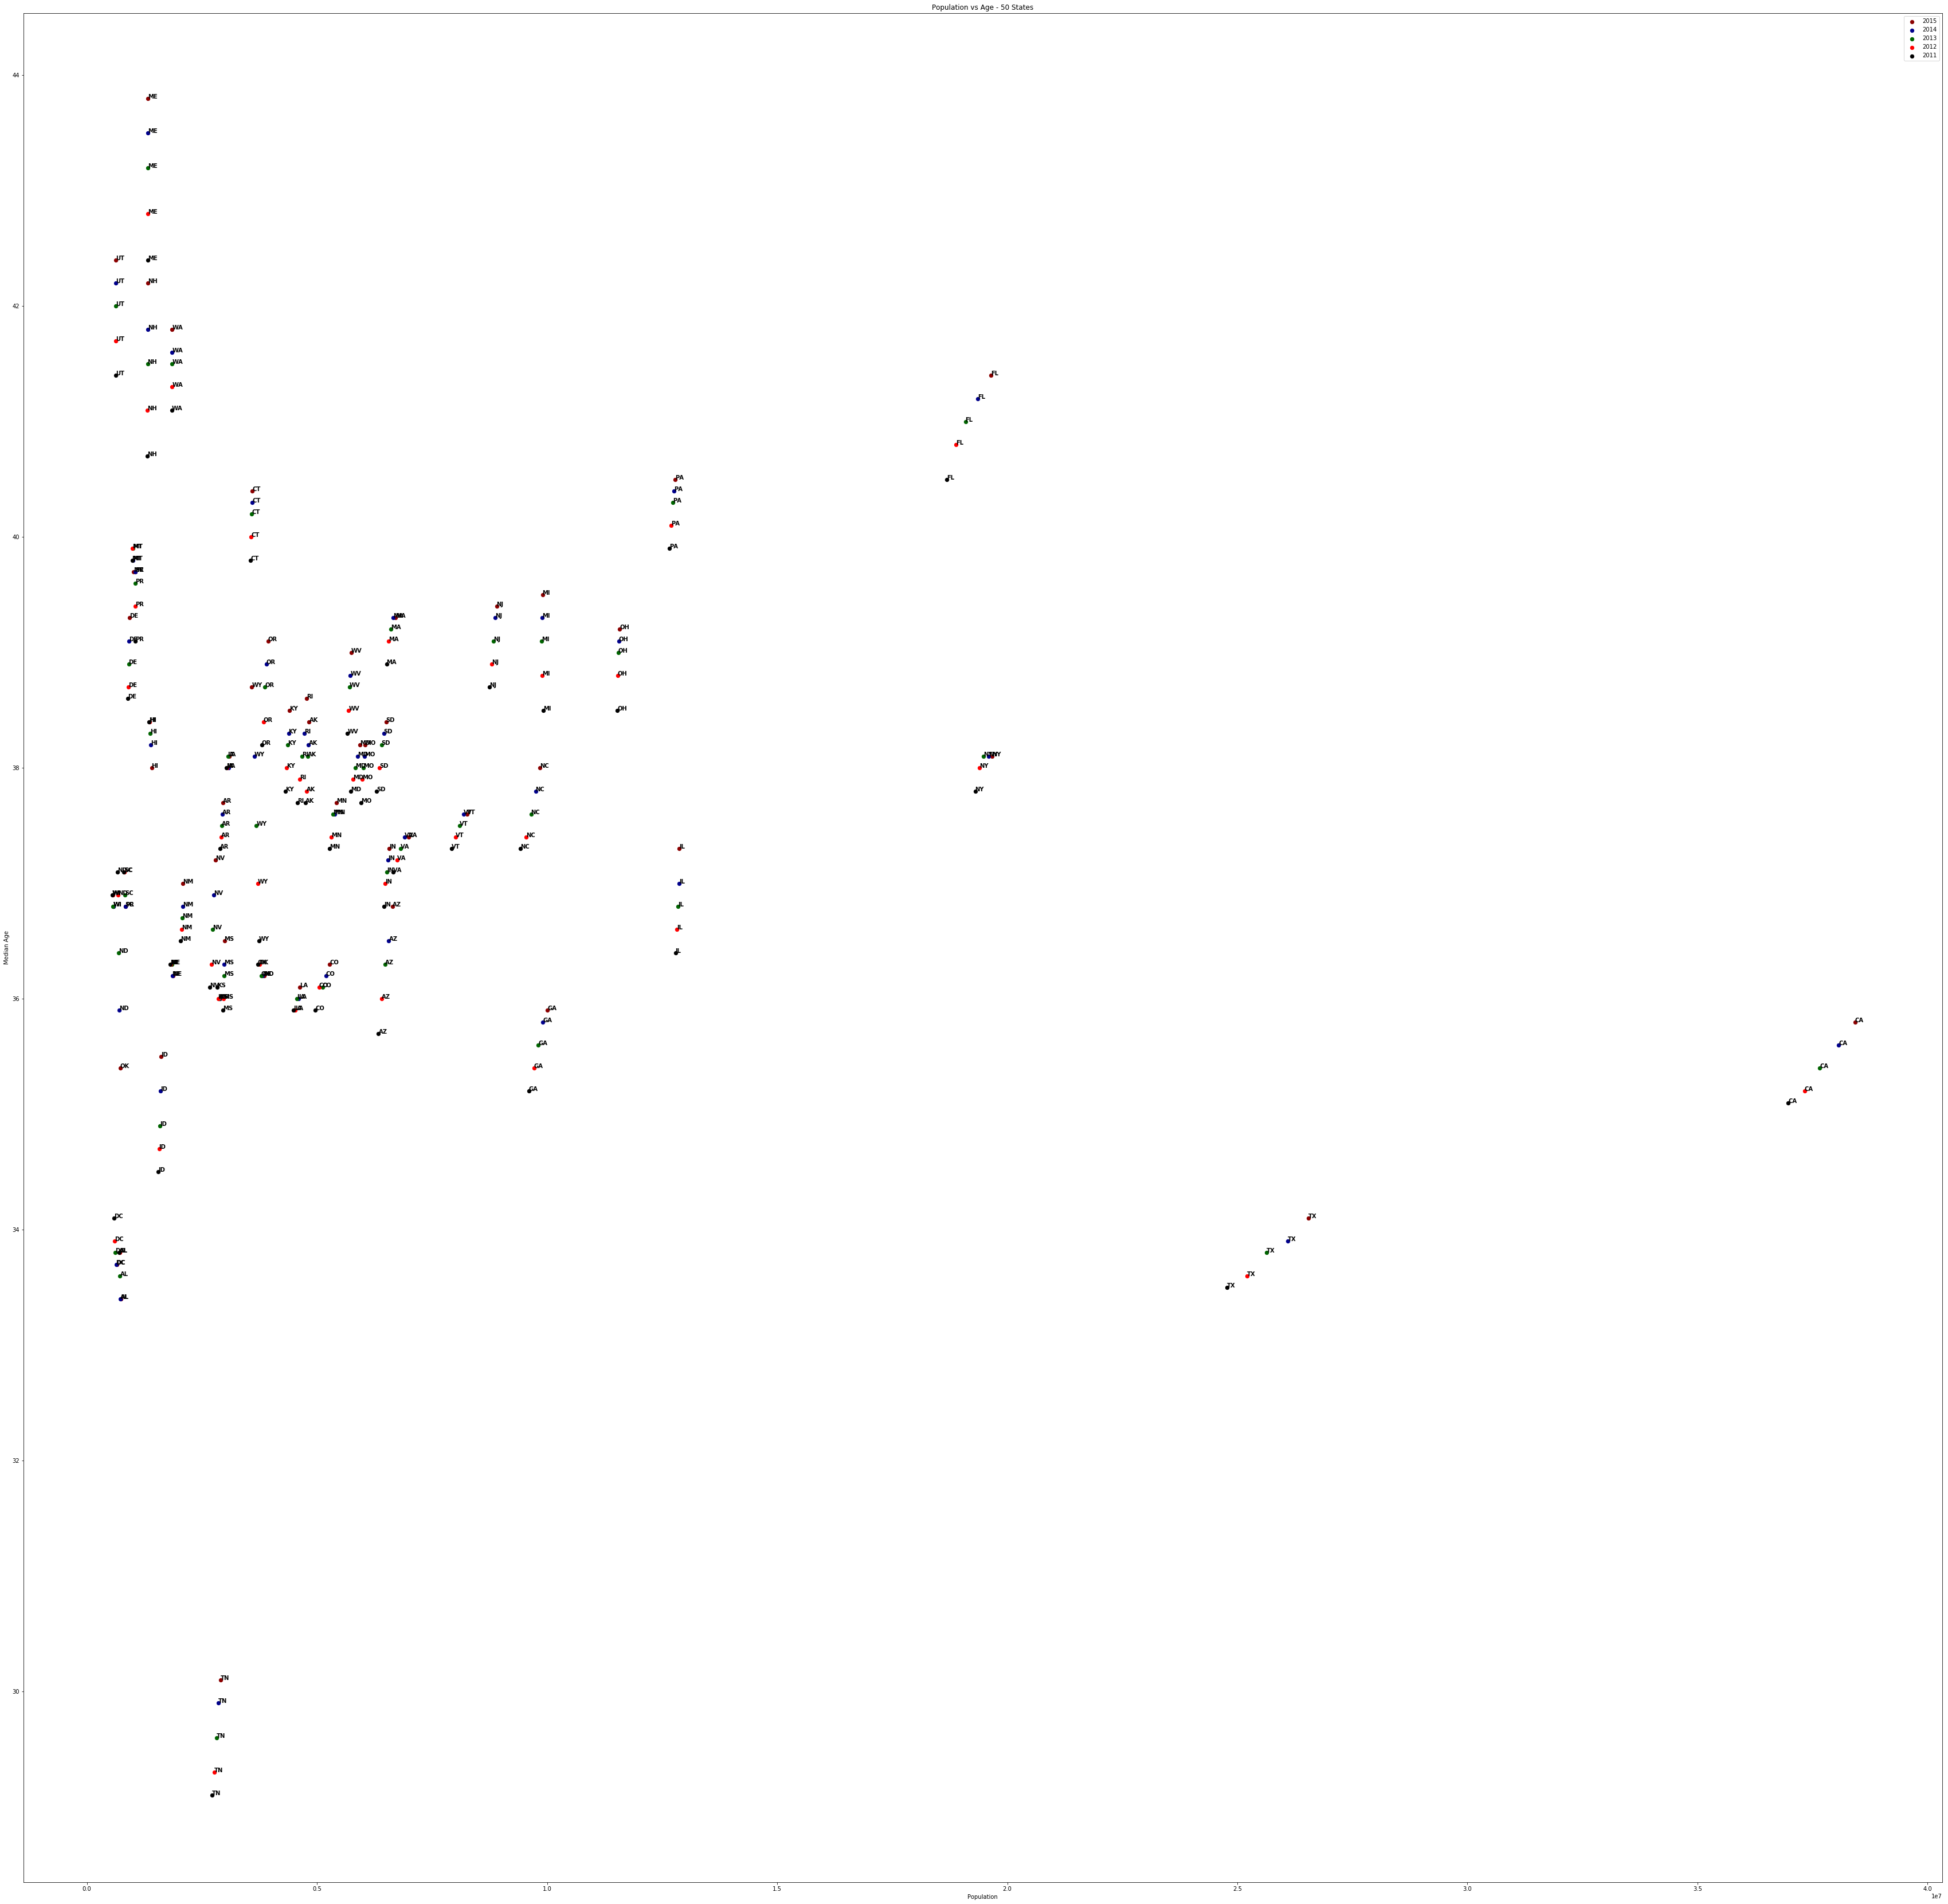

In [19]:
# 50 states plot for Median Age v. Population

census_2011_2015_50States=census_merge1112131415
census_2011_2015_50States = census_2011_2015_50States.set_index('Name')
census_2011_2015_50States

census_2011_2015_5States=census_merge1112131415_5
census_2011_2015_5States = census_2011_2015_5States.set_index('Name')
census_2011_2015_5States

census_2011_2015_50States.head()
census_2011_2015_5States.head()

census_2011_2015_50States["Population (2015)"] = pd.to_numeric(census_2011_2015_50States["Population (2015)"])
census_2011_2015_50States["Median Age (2015)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2015)"])
census_2011_2015_50States["Population (2014)"] = pd.to_numeric(census_2011_2015_50States["Population (2014)"])
census_2011_2015_50States["Median Age (2014)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2014)"])
census_2011_2015_50States["Population (2013)"] = pd.to_numeric(census_2011_2015_50States["Population (2013)"])
census_2011_2015_50States["Median Age (2013)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2013)"])
census_2011_2015_50States["Population (2012)"] = pd.to_numeric(census_2011_2015_50States["Population (2012)"])
census_2011_2015_50States["Median Age (2012)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2012)"])
census_2011_2015_50States["Population"] = pd.to_numeric(census_2011_2015_50States["Population"])
census_2011_2015_50States["Median Age"] = pd.to_numeric(census_2011_2015_50States["Median Age"])

census_2011_2015_5States["Population (2015)"] = pd.to_numeric(census_2011_2015_5States["Population (2015)"])
census_2011_2015_5States["Median Age (2015)"] = pd.to_numeric(census_2011_2015_5States["Median Age (2015)"])
census_2011_2015_5States["Population (2014)"] = pd.to_numeric(census_2011_2015_5States["Population (2014)"])
census_2011_2015_5States["Median Age (2014)"] = pd.to_numeric(census_2011_2015_5States["Median Age (2014)"])
census_2011_2015_5States["Population (2013)"] = pd.to_numeric(census_2011_2015_5States["Population (2013)"])
census_2011_2015_5States["Median Age (2013)"] = pd.to_numeric(census_2011_2015_5States["Median Age (2013)"])
census_2011_2015_5States["Population (2012)"] = pd.to_numeric(census_2011_2015_5States["Population (2012)"])
census_2011_2015_5States["Median Age (2012)"] = pd.to_numeric(census_2011_2015_5States["Median Age (2012)"])
census_2011_2015_5States["Population"] = pd.to_numeric(census_2011_2015_5States["Population"])
census_2011_2015_5States["Median Age"] = pd.to_numeric(census_2011_2015_5States["Median Age"])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 60
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size

st2015_noskip=['AL','AK','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','OK','NE','NH','NJ','NM','NV','NY','OH','ND','OR','PA','WY','SC','RI','PR','SD','TX','TN','VT','UT','VA','WV','WA','WI']
st_noskip=['AK','AL','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','PR','RI','SC','SD','TX','TN','UT','VT','VA','WA','WV','WI','WY']

ax = census_2011_2015_50States.plot.scatter(x='Population (2015)', y='Median Age (2015)', label='2015', color = 'DarkRed', s=40)
for line in range(0,census_2011_2015_50States.shape[0]):
     ax.text(census_2011_2015_50States['Population (2015)'][line]+1.1,census_2011_2015_50States['Median Age (2015)'][line], st2015_noskip[line], weight='bold')

census_2011_2015_50States.plot.scatter(x='Population (2014)', y='Median Age (2014)', label='2014', color='DarkBlue', s=40, ax=ax)
for line in range(0,census_2011_2015_50States.shape[0]):
     ax.text(census_2011_2015_50States['Population (2014)'][line]+1.1,census_2011_2015_50States['Median Age (2014)'][line], st_noskip[line], weight='bold')

census_2011_2015_50States.plot.scatter(x='Population (2013)', y='Median Age (2013)', label='2013', color='DarkGreen', s=40, ax=ax)
for line in range(0,census_2011_2015_50States.shape[0]):
     ax.text(census_2011_2015_50States['Population (2013)'][line]+1.1,census_2011_2015_50States['Median Age (2013)'][line], st_noskip[line], weight='bold')

census_2011_2015_50States.plot.scatter(x='Population (2012)', y='Median Age (2012)', label='2012', color='Red', s=40, ax=ax)
for line in range(0,census_2011_2015_50States.shape[0]):
     ax.text(census_2011_2015_50States['Population (2012)'][line]+1.1,census_2011_2015_50States['Median Age (2012)'][line], st_noskip[line], weight='bold')

census_2011_2015_50States.plot.scatter(x='Population', y='Median Age', label='2011', color='Black', s=40, ax=ax)
for line in range(0,census_2011_2015_50States.shape[0]):
     ax.text(census_2011_2015_50States['Population'][line]+1.1,census_2011_2015_50States['Median Age'][line], st_noskip[line], weight='bold')

plt.title("Population vs Age - 50 States")
plt.savefig("PopulationVersusAge_50States.png")
plt.show()

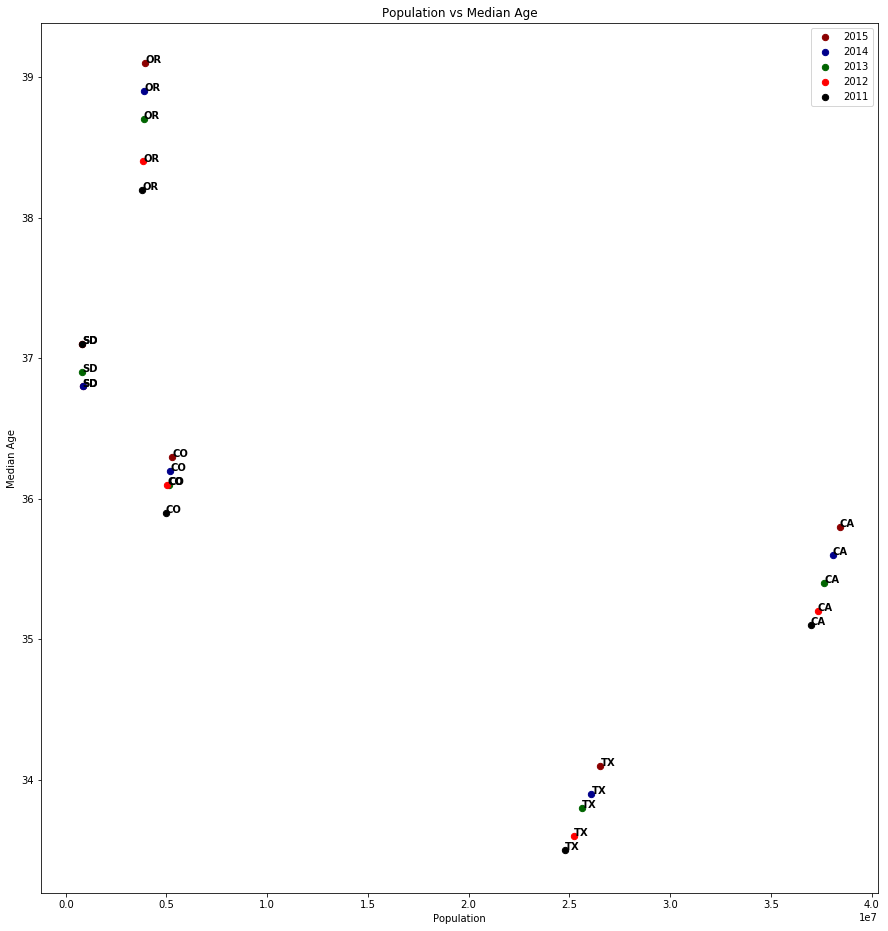

In [20]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 16
plt.rcParams["figure.figsize"] = fig_size

st_5 =['CA','CO','OR','SD', 'TX']
st_2015_5 =['CA','CO','OR','SD','TX']

ax = census_2011_2015_5States.plot.scatter(x='Population (2015)', y='Median Age (2015)', label='2015', color = 'DarkRed', s=40)
for line in range(0,census_2011_2015_5States.shape[0]):
     ax.text(census_2011_2015_5States['Population (2015)'][line]+2.0,census_2011_2015_5States['Median Age (2015)'][line], st_2015_5[line], weight='bold')

census_2011_2015_5States.plot.scatter(x='Population (2014)', y='Median Age (2014)', label='2014', color='DarkBlue', s=40, ax=ax)
for line in range(0,census_2011_2015_5States.shape[0]):
     ax.text(census_2011_2015_5States['Population (2014)'][line]+2.0,census_2011_2015_5States['Median Age (2014)'][line], st_5[line], weight='bold')

census_2011_2015_5States.plot.scatter(x='Population (2013)', y='Median Age (2013)', label='2013', color='DarkGreen', s=40, ax=ax)
for line in range(0,census_2011_2015_5States.shape[0]):
     ax.text(census_2011_2015_5States['Population (2013)'][line]+2.0,census_2011_2015_5States['Median Age (2013)'][line], st_5[line], weight='bold')

census_2011_2015_5States.plot.scatter(x='Population (2012)', y='Median Age (2012)', label='2012', color='Red', s=40, ax=ax)
for line in range(0,census_2011_2015_5States.shape[0]):
     ax.text(census_2011_2015_5States['Population (2012)'][line]+2.0,census_2011_2015_5States['Median Age (2012)'][line], st_5[line], weight='bold')

census_2011_2015_5States.plot.scatter(x='Population', y='Median Age', label='2011', color='Black', s=40, ax=ax)
for line in range(0,census_2011_2015_5States.shape[0]):
     ax.text(census_2011_2015_5States['Population'][line]+2.0,census_2011_2015_5States['Median Age'][line], st_5[line], weight='bold')

plt.title("Population vs Median Age")
plt.savefig("PopulationVersusAge_5States.png")
plt.show()

In [21]:
# Adding in Year columns

# amended 2011 code above
census_pd11s = pd.DataFrame(census_data11)
census_pd11s = census_pd11s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value",
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd11s["Unemployment Rate"] = 100 * \
    census_pd11s["Unemployment Count"].astype(
        int) / census_pd11s["Population"].astype(int)
census_pd11s = census_pd11s[["State", "Name", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd11s["Year"] = "2011"


# amended 2012 code above
census_pd12s = pd.DataFrame(census_data12)
census_pd12s = census_pd12s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value", 
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd12s["Unemployment Rate"] = 100 * \
    census_pd12s["Unemployment Count"].astype(
        int) / census_pd12s["Population"].astype(int)
census_pd12s = census_pd12s[["Name", "State", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd12s["Year"] = "2012"


# amended 2013 code above
census_pd13s = pd.DataFrame(census_data13)
census_pd13s = census_pd13s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value", 
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd13s["Unemployment Rate"] = 100 * \
    census_pd13s["Unemployment Count"].astype(
        int) / census_pd13s["Population"].astype(int)
census_pd13s = census_pd13s[["Name", "State", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd13s["Year"] = "2013"


# amended 2014 code above
census_pd14s = pd.DataFrame(census_data14)
census_pd14s = census_pd14s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value", 
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd14s["Unemployment Rate"] = 100 * \
    census_pd14s["Unemployment Count"].astype(
        int) / census_pd14s["Population"].astype(int)
census_pd14s = census_pd14s[["Name", "State", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd14s["Year"] = "2014"


# amended 2015 code above
census_pd15s = pd.DataFrame(census_data15)
census_pd15s = census_pd15s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value", 
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd15s["Unemployment Rate"] = 100 * \
    census_pd15s["Unemployment Count"].astype(
        int) / census_pd15s["Population"].astype(int)
census_pd15s = census_pd15s[["Name", "State", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd15s["Year"] = "2015"


#Append and drop for only 5 states

new = census_pd11s.append([census_pd12s,census_pd13s,census_pd14s,census_pd15s], ignore_index=True)
year5states = new.drop([0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 249, 251, 253, 254, 255, 256, 257, 258, 259])
year5states


,Household Income,Median Age,Median Home Value,Median Rent,Name,Population,State,Unemployment Rate,Year
4,61632,35.1,421600,1083,California,36969200,06,5.055211,2011
5,57685,35.9,236700,771,Colorado,4966061,08,4.093365,2011
37,49850,38.2,252600,716,Oregon,3801991,41,5.030943,2011
41,48010,37.1,127000,482,South Dakota,807697,46,2.594785,2011
43,50920,33.5,126400,651,Texas,24774187,48,3.594217,2011
56,61400,35.2,383900,1110,California,3.73251e+07,06,5.517589,2012
57,58244,36.1,236800,802,Colorado,5.04285e+06,08,4.331259,2012
89,50036,38.4,246100,729,Oregon,3.83663e+06,41,5.483435,2012
93,49091,37.1,129800,505,South Dakota,815871,46,2.658141,2012
95,51563,33.6,128000,666,Texas,2.52089e+07,48,3.809798,2012


In [22]:
# Adding in Year columns

# amended 2011 code above
census_pd11s = pd.DataFrame(census_data11)
census_pd11s = census_pd11s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value",
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd11s["Unemployment Rate"] = 100 *     census_pd11s["Unemployment Count"].astype(
        int) / census_pd11s["Population"].astype(int)
census_pd11s = census_pd11s[["State", "Name", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd11s["Year"] = "2011"


# amended 2012 code above
census_pd12s = pd.DataFrame(census_data12)
census_pd12s = census_pd12s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value", 
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd12s["Unemployment Rate"] = 100 *     census_pd12s["Unemployment Count"].astype(
        int) / census_pd12s["Population"].astype(int)
census_pd12s = census_pd12s[["Name", "State", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd12s["Year"] = "2012"


# amended 2013 code above
census_pd13s = pd.DataFrame(census_data13)
census_pd13s = census_pd13s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value", 
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd13s["Unemployment Rate"] = 100 *     census_pd13s["Unemployment Count"].astype(
        int) / census_pd13s["Population"].astype(int)
census_pd13s = census_pd13s[["Name", "State", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd13s["Year"] = "2013"


# amended 2014 code above
census_pd14s = pd.DataFrame(census_data14)
census_pd14s = census_pd14s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value", 
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd14s["Unemployment Rate"] = 100 *     census_pd14s["Unemployment Count"].astype(
        int) / census_pd14s["Population"].astype(int)
census_pd14s = census_pd14s[["Name", "State", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd14s["Year"] = "2014"


# amended 2015 code above
census_pd15s = pd.DataFrame(census_data15)
census_pd15s = census_pd15s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value", 
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd15s["Unemployment Rate"] = 100 *     census_pd15s["Unemployment Count"].astype(
        int) / census_pd15s["Population"].astype(int)
census_pd15s = census_pd15s[["Name", "State", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd15s["Year"] = "2015"


#Append and drop for only 5 states

new = census_pd11s.append([census_pd12s,census_pd13s,census_pd14s,census_pd15s], ignore_index=True)
year5states = new.drop([0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 249, 251, 253, 254, 255, 256, 257, 258, 259])
year5states



,Household Income,Median Age,Median Home Value,Median Rent,Name,Population,State,Unemployment Rate,Year
4,61632,35.1,421600,1083,California,36969200,06,5.055211,2011
5,57685,35.9,236700,771,Colorado,4966061,08,4.093365,2011
37,49850,38.2,252600,716,Oregon,3801991,41,5.030943,2011
41,48010,37.1,127000,482,South Dakota,807697,46,2.594785,2011
43,50920,33.5,126400,651,Texas,24774187,48,3.594217,2011
56,61400,35.2,383900,1110,California,3.73251e+07,06,5.517589,2012
57,58244,36.1,236800,802,Colorado,5.04285e+06,08,4.331259,2012
89,50036,38.4,246100,729,Oregon,3.83663e+06,41,5.483435,2012
93,49091,37.1,129800,505,South Dakota,815871,46,2.658141,2012
95,51563,33.6,128000,666,Texas,2.52089e+07,48,3.809798,2012


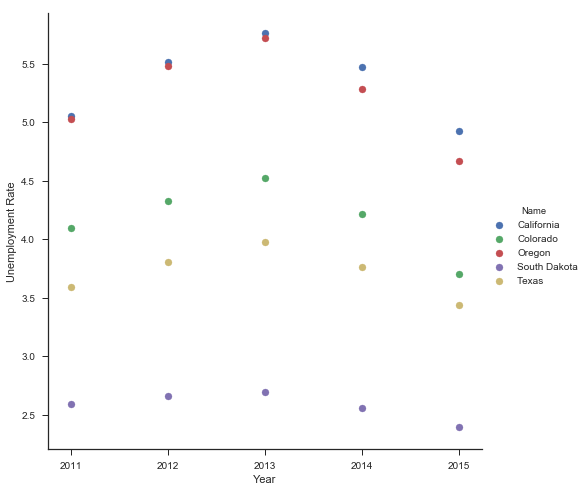

In [23]:
# Umemployment Rate by Year Chart

sns.set(style='ticks')
fg = sns.FacetGrid(data=year5states, hue="Name", size=7)
fg.map(plt.scatter, "Year", 'Unemployment Rate').add_legend()
plt.savefig("UnemploymentByYear.png")
plt.show()


In [24]:
# to_numeric for Seaborn Charts

year5states["Population"] = pd.to_numeric(year5states["Population"])
year5states["Unemployment Rate"] = pd.to_numeric(year5states["Unemployment Rate"])
year5states["Household Income"] = pd.to_numeric(year5states["Household Income"])
year5states["Median Age"] = pd.to_numeric(year5states["Median Age"])
year5states["Median Home Value"] = pd.to_numeric(year5states["Median Home Value"])
year5states["Median Rent"] = pd.to_numeric(year5states["Median Rent"])

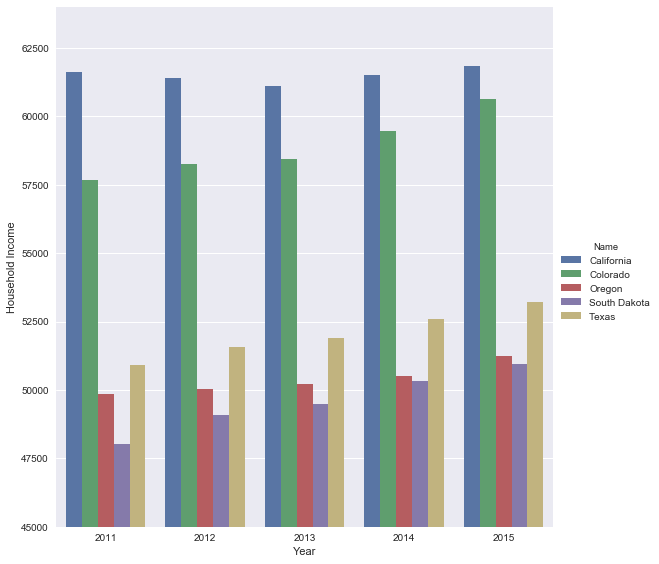

In [25]:
# Household Income by State Chart

sns.set(style='darkgrid')
sns.factorplot(x='Year', y='Household Income', hue='Name', data=year5states, kind="bar", size=8)
plt.ylim(45000, 64000)

plt.savefig("IncomeByYear.png")
plt.show()

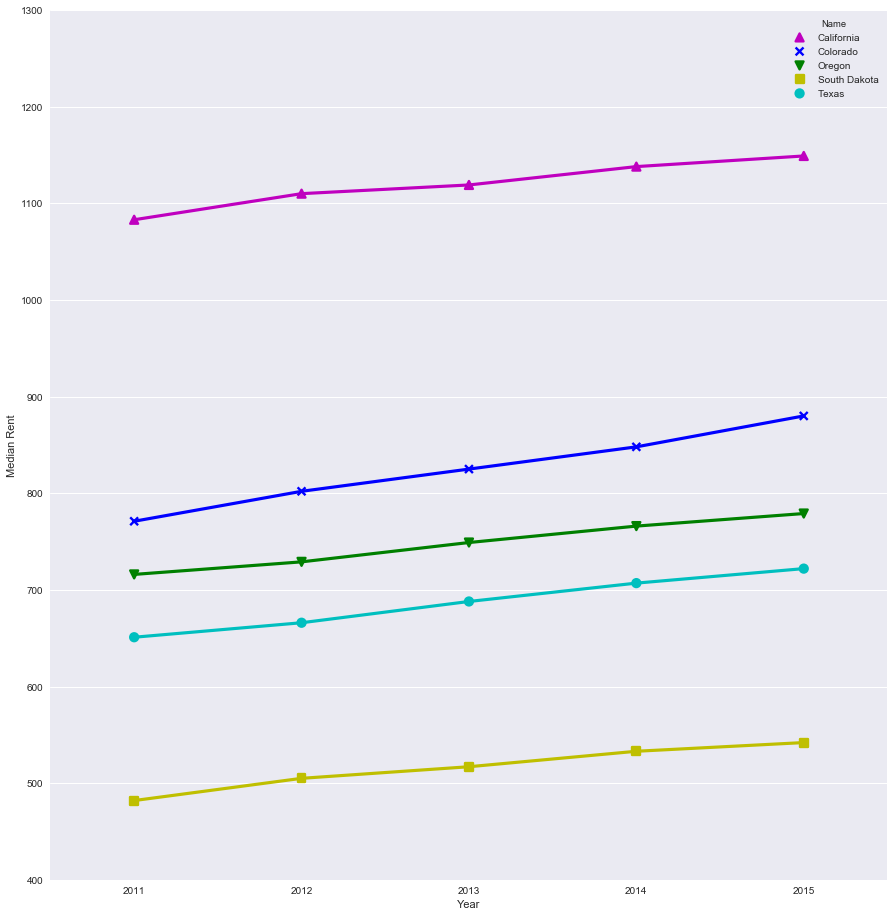

In [26]:
# Median Rent by State

sns.pointplot(x="Year", y="Median Rent", hue="Name", data=year5states,
              palette={"Oregon": "g", "California": "m", "Colorado": "b", "Texas": "c", "South Dakota": "y"},
              markers=["^", "x", "v", "s", "o"], linestyles=["-", "-", "-", "-", "-"])
plt.ylim(400,1300)

plt.savefig("RentByYear.png")
plt.show()

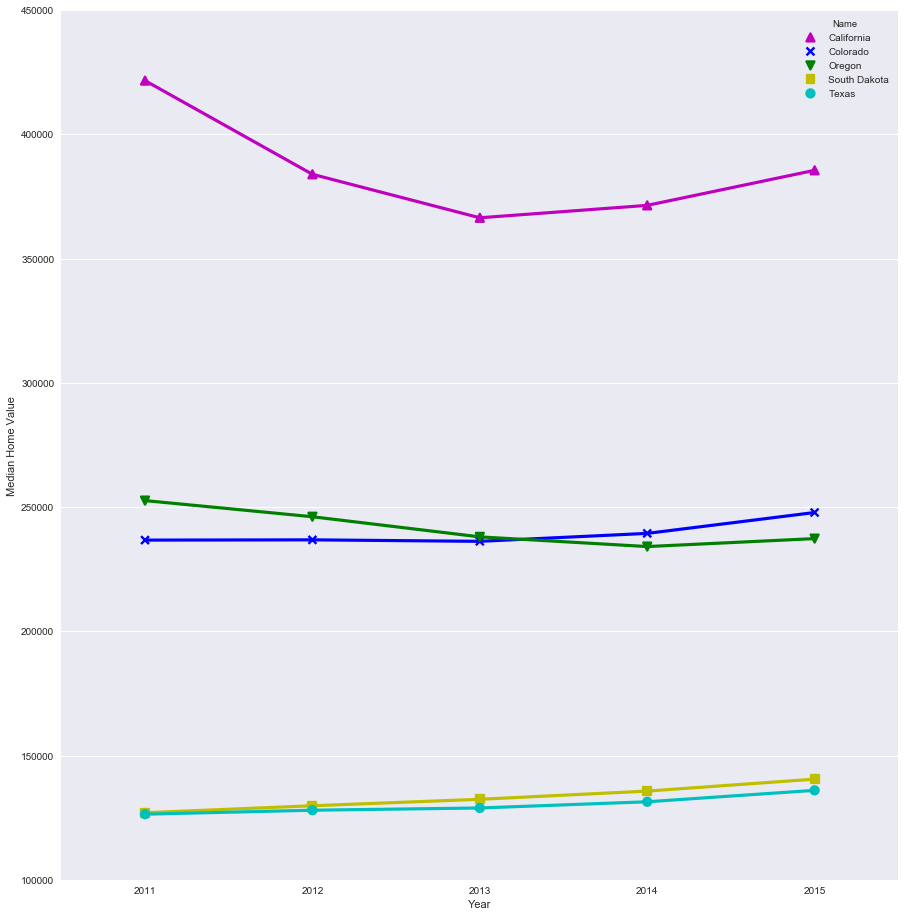

In [27]:
# Home Value by Year

sns.pointplot(x="Year", y="Median Home Value", hue="Name", data=year5states,
              palette={"Oregon": "g", "California": "m", "Colorado": "b", "Texas": "c", "South Dakota": "y"},
              markers=["^", "x", "v", "s", "o"], linestyles=["-", "-", "-", "-", "-"])
plt.ylim(100000,450000)

plt.savefig("HomeValueByYear.png")
plt.show()
